<a href="https://colab.research.google.com/github/Adedotun-Adepoju/Face-Detection/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the required libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Access Google drive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
# Paths for the images pixel values to be read
path_0='/content/gdrive/My Drive/iQube/how-many-faces-testcases/input/input00.txt'
path_1='/content/gdrive/My Drive/iQube/how-many-faces-testcases/input/input01.txt'
path_2='/content/gdrive/My Drive/iQube/how-many-faces-testcases/input/input02.txt'

In [4]:
# Read the arrays as a DataFrame
img_0=pd.read_csv(path_0, sep=' ',header=None,skiprows=1)
img_1=pd.read_csv(path_1, sep=' ',header=None,skiprows=1)
img_2=pd.read_csv(path_2, sep=' ',header=None,skiprows=1)

In [5]:
# Print the shape of the image arrays
print("The shapes of the images are {},{},{}".format(img_0.shape,img_1.shape,img_2.shape))

The shapes of the images are (418, 870),(173, 291),(288, 460)


In [6]:
# Converting from a dataframe to an Array
img_0=img_0.values
img_1=img_1.values
img_2=img_2.values

In [7]:
# A function to split each string to individual values and convert each value to a float datatype
def str_to_float(str_arr):
    for i in range(str_arr.shape[0]):
        for j in range(str_arr.shape[1]):
            str_arr[i][j]=str_arr[i][j].split(sep=',')
            str_arr[i][j]= list(map(float,str_arr[i][j]))
    return str_arr

In [8]:
# Applying the function to the three images 
str_to_float(img_0)
str_to_float(img_1)
str_to_float(img_2)

array([[list([174.0, 155.0, 147.0]), list([176.0, 155.0, 147.0]),
        list([177.0, 156.0, 148.0]), ..., list([98.0, 102.0, 103.0]),
        list([94.0, 98.0, 99.0]), list([94.0, 98.0, 99.0])],
       [list([175.0, 156.0, 148.0]), list([175.0, 156.0, 148.0]),
        list([178.0, 157.0, 149.0]), ..., list([98.0, 102.0, 103.0]),
        list([92.0, 96.0, 97.0]), list([91.0, 95.0, 96.0])],
       [list([175.0, 158.0, 149.0]), list([177.0, 158.0, 150.0]),
        list([178.0, 160.0, 149.0]), ..., list([97.0, 101.0, 102.0]),
        list([92.0, 96.0, 97.0]), list([92.0, 96.0, 97.0])],
       ...,
       [list([161.0, 144.0, 141.0]), list([162.0, 145.0, 142.0]),
        list([158.0, 141.0, 138.0]), ..., list([36.0, 31.0, 30.0]),
        list([35.0, 30.0, 29.0]), list([34.0, 29.0, 28.0])],
       [list([161.0, 144.0, 141.0]), list([161.0, 144.0, 141.0]),
        list([158.0, 141.0, 138.0]), ..., list([35.0, 30.0, 29.0]),
        list([34.0, 29.0, 28.0]), list([33.0, 28.0, 27.0])],
       

In [9]:
# A function to flatten the values so the array can be reshaped conveniently
def flatten_list(two_dim_list):
  flat_list=[]
  for element in two_dim_list:
    for ind_list in element:
      for value in ind_list:
        flat_list.append(value)
  return flat_list

In [10]:
# Apply the function to the images
img_0_flat=flatten_list(img_0)
img_1_flat=flatten_list(img_1)
img_2_flat=flatten_list(img_2)

In [11]:
img_0_flat=np.array(img_0_flat, dtype=np.uint8)
img_1_flat=np.array(img_1_flat, dtype=np.uint8)
img_2_flat=np.array(img_2_flat, dtype=np.uint8)

In [12]:
img_0.shape

(418, 870)

In [13]:
# Reshape the arrays
img_0=img_0_flat.reshape(img_0.shape[0],img_0.shape[1],3)
img_1=img_1_flat.reshape(img_1.shape[0],img_1.shape[1],3)
img_2=img_2_flat.reshape(img_2.shape[0],img_2.shape[1],3)

In [14]:
# Display the shape of the arrays
print("New shape of Arrays: {},{},{}".format(img_0.shape,img_1.shape,img_2.shape))

New shape of Arrays: (418, 870, 3),(173, 291, 3),(288, 460, 3)


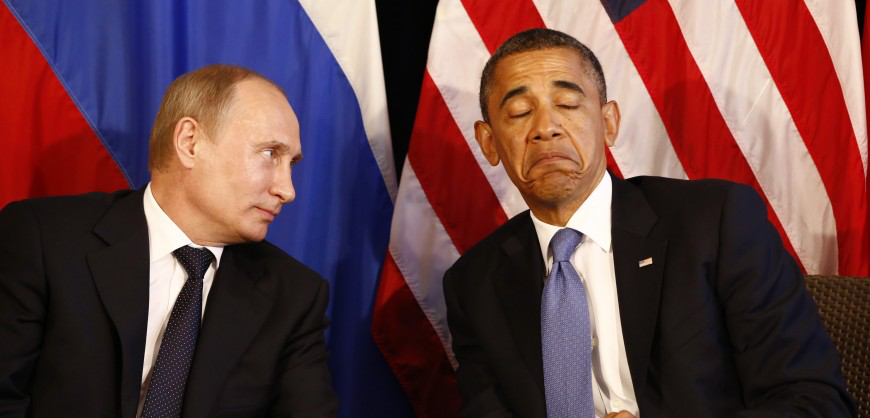

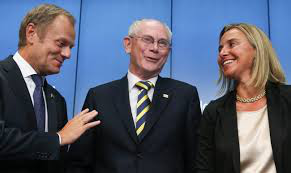

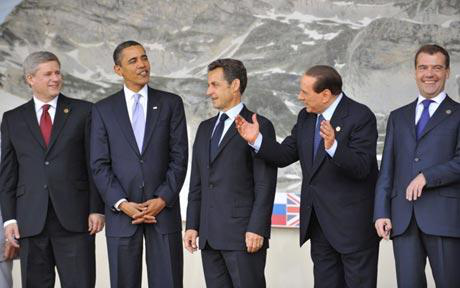

In [15]:
# Displaying the images
from google.colab.patches import cv2_imshow
cv2_imshow(img_0);cv2_imshow(img_1);cv2_imshow(img_2)

In [16]:
# A function to resize the image
def res_img(img,scale_percent):
  width=int(img.shape[1]*scale_percent/100)
  height=int(img.shape[0]*scale_percent/100)
  dim=(width,height)
  resized_img=cv2.resize(img,dim,interpolation=cv2.INTER_AREA)
  return resized_img

In [17]:
# Import the files for face detection
!pip install git+git://github.com/PnS2019/pnslib.git
from pnslib import utils
face_cascade = cv2.CascadeClassifier(
    utils.get_haarcascade_path('haarcascade_frontalface_default.xml'))

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-15ybm5pm
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-15ybm5pm
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp37-none-any.whl size=1489618 sha256=76c7fb6789a2042075d53a7fef788cacaf7160b8ecf18e9fec2964353f98f0ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-09lqux8w/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib


number of face(s)= 2


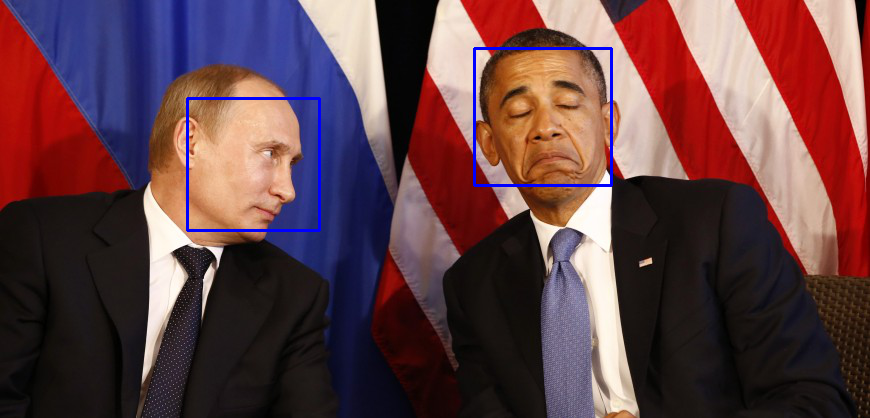

In [18]:
# Detect the number of faces in the first image
gray_0 = cv2.cvtColor(img_0, cv2.COLOR_BGR2GRAY)
faces_0 = face_cascade.detectMultiScale(gray_0,1.1,5)
count_faces=str(len(faces_0))
print ("number of face(s)= " + count_faces)
for (x, y, w, h) in faces_0:
    cv2.rectangle(img_0, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
cv2_imshow(img_0)

number of face(s)= 5


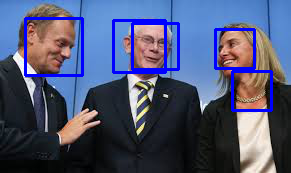

In [19]:
# Detect the number of faces in the second image
gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
faces_1 = face_cascade.detectMultiScale(gray_1,1.00149,4)
count_faces=str(len(faces_1))
print ("number of face(s)= " + count_faces)
for (x, y, w, h) in faces_1:
    cv2.rectangle(img_1, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
cv2_imshow(img_1)

number of face(s)= 5


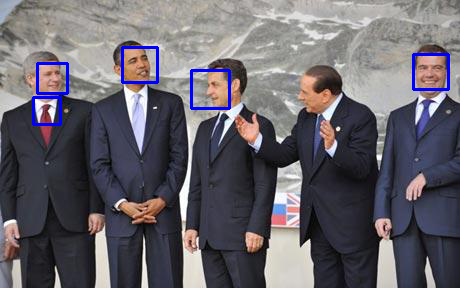

In [20]:
# Detect the number of faces in the third image
gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY) # Convert the image to gray scale
faces_2 = face_cascade.detectMultiScale(gray_2,1.05,2)
count_faces=str(len(faces_2))
print ("number of face(s)= " + count_faces)
for (x, y, w, h) in faces_2:
    cv2.rectangle(img_2, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
cv2_imshow(img_2)